In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
Degree_To_Rad = np.pi/180.
AU_To_Meter = 1.496e11
yr = np.pi*1e7 # 365*24*3600 # yr in [s]
G = 6.6743e-11 # SI units
c_light = 3.e8

m_Sun = 1.99e30 # solar mass in [kg]
R_Sun = 6.957e8 # solar radius in [m]
L_Sun = 3.828e26 # solar luminosity in [watts]
T_Sun = 5772 # solar temperature in [K]
m_J = 1.898e27 # Jupiter mass in [kg]
R_J = 7.1492e7 # Jupiter radius in [m]
a_J = 7.78479e8 # Jupiter semi-major axis in [m]
m_E = 5.9722e24 # Earth mass in [kg]
R_E = 6.371e6 # Earth radius in [m]

# m_Planet = k2 * m_J

observation
--

In [3]:
df = pd.read_csv('./planet_archive.csv', comment='#')
df

,pl_name,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_masse,pl_masseerr1,pl_masseerr2,pl_masselim,pl_msinie,...,pl_msinieerr2,pl_msinielim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim
0,11 Com b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5434.700000,...,-413.200000,0.0,5434.700000,540.300000,-413.200000,0.0,NaN,NaN,NaN,NaN
1,11 Com b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6165.600000,...,-476.700000,0.0,6165.600000,476.700000,-476.700000,0.0,0.231,0.005,-0.005,0.0
2,11 Com b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4914.898486,...,-39.728551,0.0,4914.898486,39.092894,-39.728551,0.0,0.238,0.007,-0.007,0.0
3,11 UMi b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4684.814200,...,-794.575000,0.0,4684.814200,794.575000,-794.575000,0.0,0.080,0.030,-0.030,0.0
4,11 UMi b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3432.400000,...,-413.200000,0.0,3432.400000,381.400000,-413.200000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38416,ups And d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1255.380000,...,-41.320000,0.0,1255.380000,41.320000,-41.320000,0.0,0.269,0.036,-0.036,0.0
38417,ups Leo b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.092488,...,-82.635386,0.0,162.092488,19.069704,-82.635386,0.0,0.320,0.134,-0.218,0.0
38418,xi Aql b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,642.000000,...,-63.600000,0.0,642.000000,63.600000,-63.600000,0.0,NaN,NaN,NaN,NaN
38419,xi Aql b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,890.000000,...,NaN,0.0,890.000000,NaN,NaN,0.0,0.000,NaN,NaN,0.0


In [4]:
# df['pl_rade'] # planet radius in [earth radius]
# df['pl_masse'] # planet mass in [earth mass]
# df['pl_msinie'] # planet mass * sin(i) [earth mass]

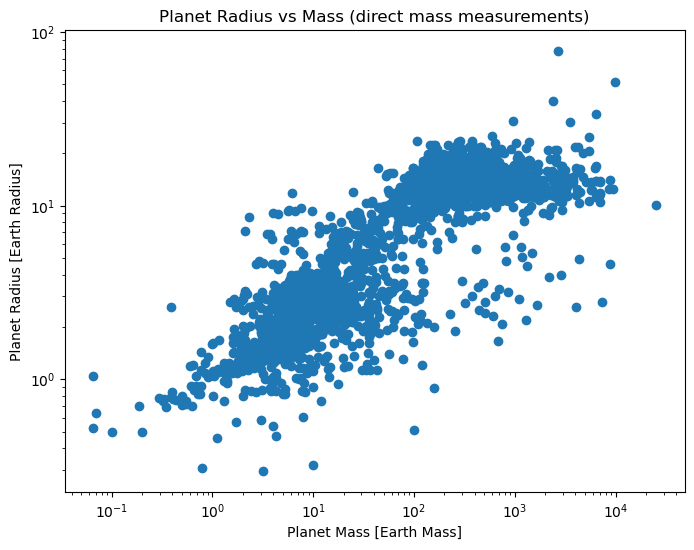

In [5]:
# Filter out rows where radius or mass are NaN
mask = ~df['pl_rade'].isna() & ~df['pl_masse'].isna()

plt.figure(figsize=(8,6))
plt.scatter(df.loc[mask, 'pl_masse'], df.loc[mask, 'pl_rade'])
plt.xlabel('Planet Mass [Earth Mass]')
plt.ylabel('Planet Radius [Earth Radius]')
plt.xscale('log')
plt.yscale('log')
plt.title('Planet Radius vs Mass (direct mass measurements)')
plt.show()


model
--

We define:

$$
M = k_2 \, M_J
$$

where:

* $k_2$ = mass in units of Jupiter mass
* $M_J$ = mass of Jupiter
* $M_\oplus$ = mass of Earth
* $R_J$ = radius of Jupiter
* $R_\oplus$ = radius of Earth

We convert mass to Earth units:

$$
M_\oplus = \frac{M}{M_\oplus}
$$

---

We define mass thresholds:

$$
k_{2,\text{terr}} = \frac{2.04}{M_J / M_\oplus} \approx 0.00642
$$

$$
k_{2,\text{nep}} = \frac{132.7}{M_J / M_\oplus} \approx 0.4178
$$

---

Then the radius $R$ is given by

$$
R = \begin{cases}
R_\oplus \, M_\oplus^{0.28}, & M_\oplus \leq 2.04 \quad (\text{rocky planets}) \\[10pt]
R_\oplus \, (2.04)^{0.28 - 0.59} \, M_\oplus^{0.59}, & 2.04 < M_\oplus \leq 132.7 \quad (\text{ice giants / Neptune-like}) \\[10pt]
R_\oplus \, (2.04)^{0.28 - 0.59} (132.7)^{0.59 - (-0.04)} \, M_\oplus^{-0.04}, & M_\oplus > 132.7 \quad (\text{gas giants})
\end{cases}
$$


In [16]:
# Chen & Kipping (2017) https://ui.adsabs.harvard.edu/abs/2017ApJ...834...17C/abstract
k2_array = np.logspace(-4, 2, 1000) # k2 = m_planet/m_J

# mass thresholds in Jupiter mass units
k2_terr = 2.04 / (m_J / m_E)  # ~0.00642
k2_nep = 132.7 / (m_J / m_E)  # ~0.4178

R_Planet_list = []
for k2 in k2_array:
    m_Planet = k2 * m_J  # mass in kg
    m_Planet_E = m_Planet / m_E  # mass in Earth masses

    if k2 <= k2_terr:
        R_Planet = R_E * m_Planet_E**0.28 # rocky planet; steeper
    elif k2 <= k2_nep:
        # prefactor for continuity
        factor = (2.04)**(0.28 - 0.59)
        R_Planet = R_E * factor * m_Planet_E**0.59 # ice giant / Neptune-like; radius shrinks faster with decreasing mass
    else:
        # prefactor for continuity
        factor = (2.04)**(0.28 - 0.59) * (132.7)**(0.59 - (-0.04))
        R_Planet = R_E * factor * m_Planet_E**(-0.04) # gas giant; nearly flat
    
    R_Planet_list.append(R_Planet / R_E)  # in Earth radii

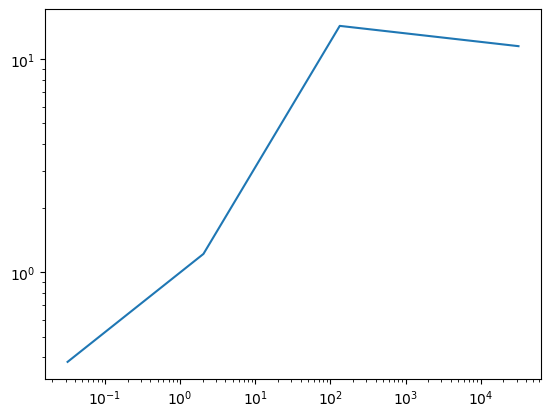

In [22]:
plt.xscale('log')
plt.yscale('log')
plt.plot(k2_array*m_J/m_E, R_Planet_list)

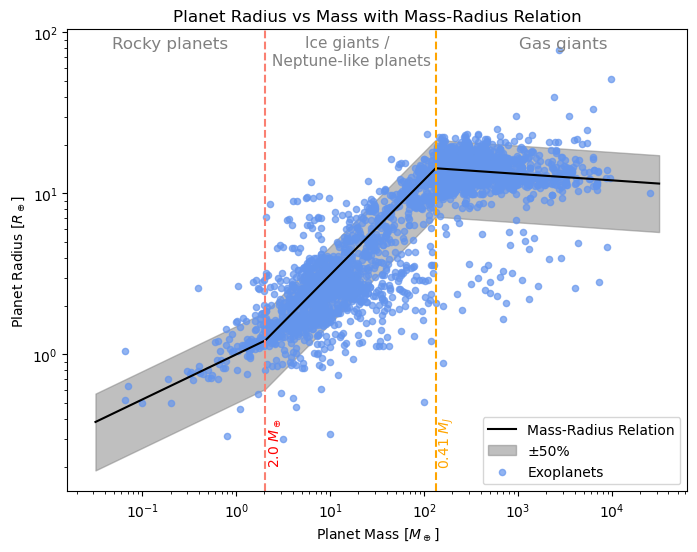

In [92]:
# Compute ±50%
R_Planet_array = np.array(R_Planet_list)
R_Planet_upper = R_Planet_array * 1.50
R_Planet_lower = R_Planet_array * 0.50

# --- Plot ---
plt.figure(figsize=(8,6))

# Plot the radius-mass relation
plt.plot(k2_array*m_J/m_E, R_Planet_list, color='black', label='Mass-Radius Relation')

plt.axvline(k2_terr*m_J/m_E, ls='--', c='salmon')
plt.axvline(k2_nep*m_J/m_E, ls='--', c='orange')

plt.text(k2_terr*m_J/m_E * 1.05, max(R_Planet_array)*0.02, '2.0 $M_\oplus$', color='r', rotation=90, va='center')
plt.text(k2_nep*m_J/m_E * 1.05, max(R_Planet_array)*0.02, '0.41 $M_J$', color='orange', rotation=90, va='center')

# region labels
y_text = max(R_Planet_array) * 1.1  # position text above data
plt.text(2e-1, 8e1, 'Rocky planets', ha='center', fontsize=12, color='grey')
plt.text(1.6e1, 6.3e1, 'Ice giants / \n Neptune-like planets', ha='center', fontsize=11, color='grey')
plt.text(3e3, 8e1, 'Gas giants', ha='center', fontsize=12, color='grey')


# Shade ±50%
plt.fill_between(k2_array*m_J/m_E, R_Planet_lower, R_Planet_upper, color='gray', alpha=0.5, label='±50%')

# Plot exoplanet data
mass_combined = df['pl_masse'].combine_first(df['pl_msinie'])
mask_data = ~df['pl_rade'].isna() & ~mass_combined.isna()

plt.scatter(mass_combined[mask_data], df.loc[mask_data, 'pl_rade'],
            s=20, alpha=0.7, c='cornflowerblue', label='Exoplanets')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Planet Mass [$M_\oplus$]')
plt.ylabel('Planet Radius [$R_\oplus$]')
plt.title('Planet Radius vs Mass with Mass-Radius Relation')
plt.legend()
plt.show()
